# Google I/O Extended 2017 Demo

In [1]:
# import essential libs
import google.datalab.bigquery as bq
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd

In [37]:
%%html
<!-- Enter your own key -->
<script src="https://maps.googleapis.com/maps/api/js?key=YOUR_KEY&callback=initMap" async defer></script>

## Basic info

### Number of bikes

In [3]:
%%bq query
select count(distinct bikeid) from `bigquery-public-data.new_york.citibike_trips`;

f0_
11852


### Number of stations

In [4]:
%%bq query
select count(*) from `bigquery-public-data.new_york.citibike_stations`;

f0_
666


### Where are the stations?

In [5]:
%%bq query --name stations
select name, latitude, longitude from `bigquery-public-data.new_york.citibike_stations`;

In [6]:
results = stations.execute().result()

In [7]:
%%chart map --fields latitude,longitude,name --data results
showTip: true
mapType: normal

### Trips by year

In [8]:
%%bq query --name trips_by_year
select cast(extract(YEAR from starttime) as string) as year, count(*) as rent_count
  from `bigquery-public-data.new_york.citibike_trips`
  group by year
  order by year

In [9]:
results = trips_by_year.execute().result()

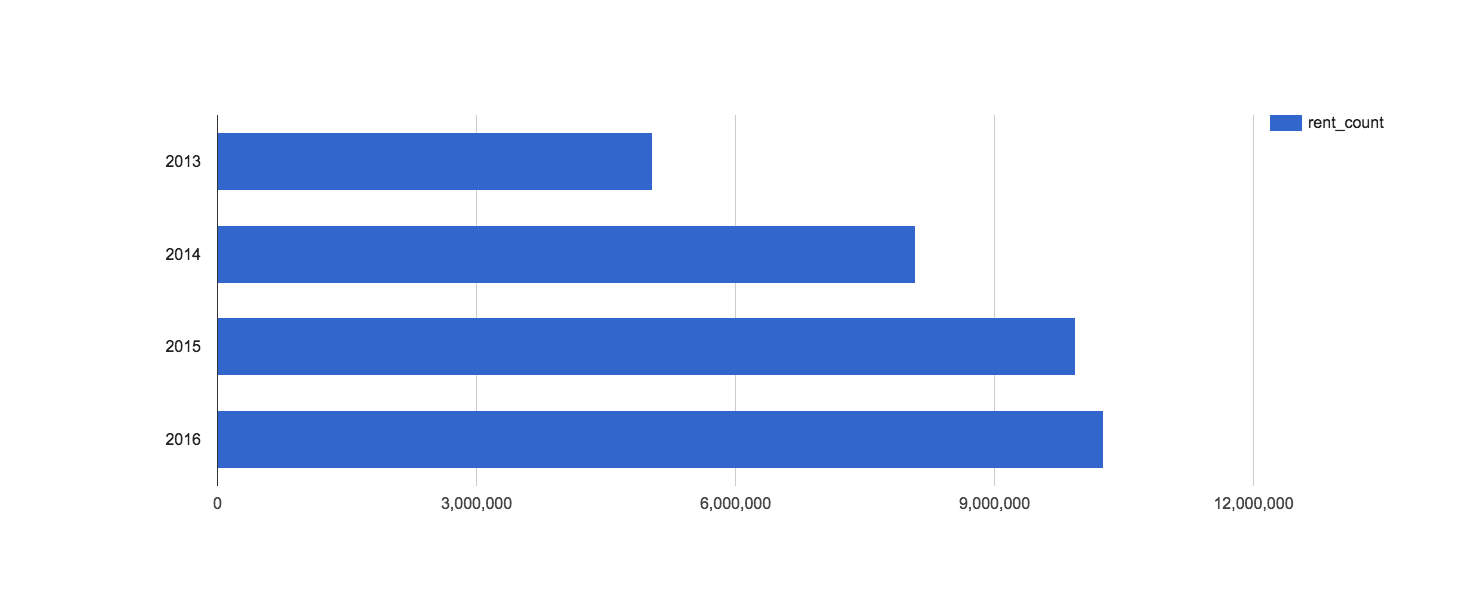

In [10]:
%%chart bars --data results
height: 600

## An average day in Citi Bike's life

### Working day

In [11]:
%%bq query --name trips_by_hour
select extract(HOUR from starttime) as hour, count(*) / 5 as rent_count
  from `bigquery-public-data.new_york.citibike_trips`
  where extract(DAYOFWEEK from starttime) between 1 and 5
  group by hour
  order by hour

In [12]:
results = trips_by_hour.execute().result()

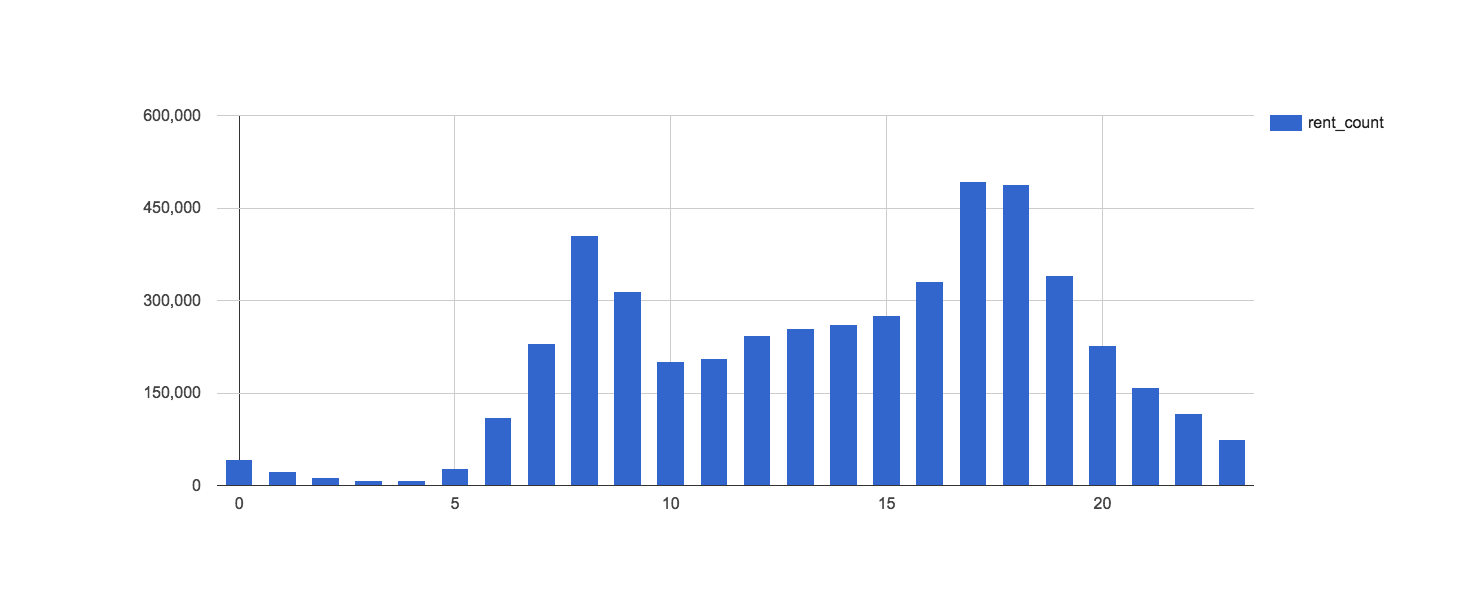

In [13]:
%%chart columns --data results
height: 600

### Weekend

In [14]:
%%bq query --name trips_by_hour
select extract(HOUR from starttime) as hour, count(*) as rent_count
  from `bigquery-public-data.new_york.citibike_trips`
  where extract(DAYOFWEEK from starttime) between 6 and 7
  group by hour
  order by hour

In [15]:
results = trips_by_hour.execute().result()

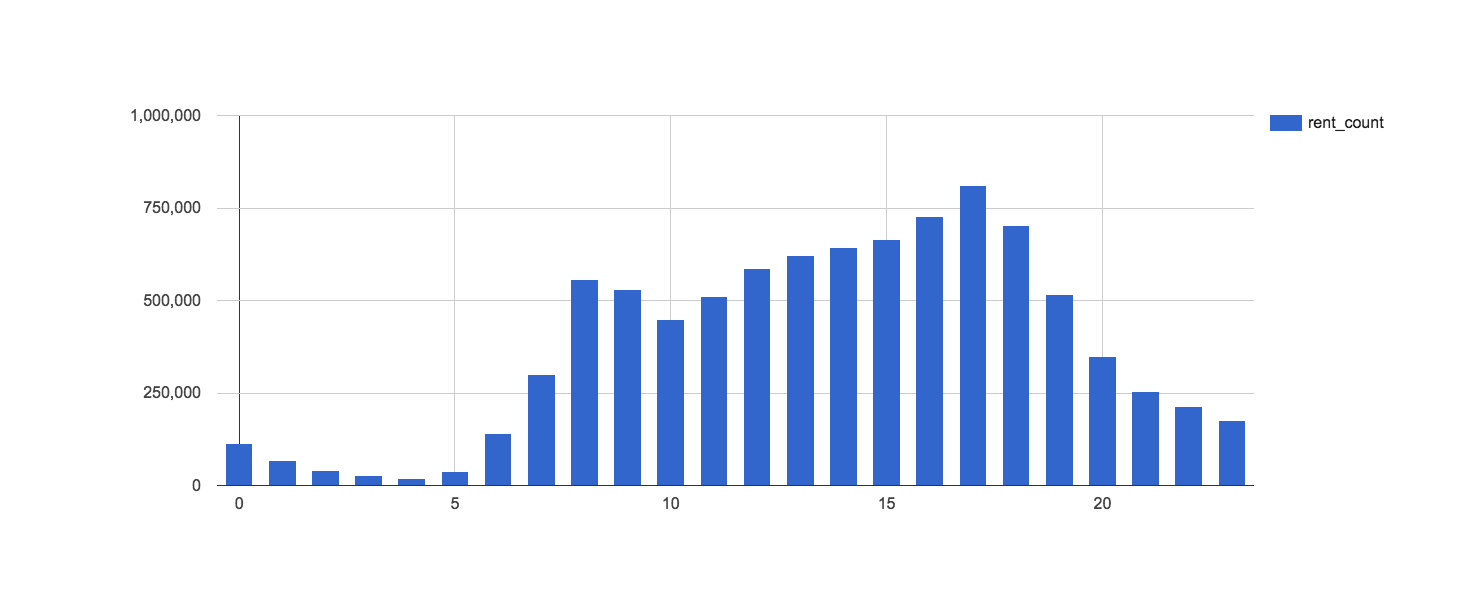

In [16]:
%%chart columns --data results
height: 600

# Ted Mosby's bike

In [17]:
%%bq query
select trips.bikeid, count(*) as rent_count
  from `bigquery-public-data.new_york.citibike_trips` trips
  group by trips.bikeid
  order by rent_count desc
  limit 1;

bikeid,rent_count
17526,5594


In [18]:
%%bq query
select count(distinct start_station_id)
  from `bigquery-public-data.new_york.citibike_trips` trips
  where trips.bikeid = 17526;

f0_
451


In [19]:
%%bq query --name visitedStations
select distinct latitude, longitude
  from `bigquery-public-data.new_york.citibike_stations` stations inner join `bigquery-public-data.new_york.citibike_trips` trips on stations.station_id = trips.start_station_id
  where trips.bikeid = 17526

In [20]:
results = visitedStations.execute().result()

In [21]:
%%chart map --fields latitude,longitude --data results
showTip: false
mapType: normal

## Subscribers vs Customers

### Trip types
Source: https://cloud.google.com/blog/big-data/2016/12/analyzing-nyc-biking-data-with-google-bigquery

In [22]:
%%bq query
SELECT  
  usertype,  
  COUNT(*) as num_trips,  
  ROUND(AVG(cast(tripduration as int64) / 60),2) as duration
FROM  
  `bigquery-public-data.new_york.citibike_trips`
GROUP BY 1

usertype,num_trips,duration
Customer,4008031,31.2
Subscriber,29310988,13.42


### Most popular stations

#### Customers

In [23]:
%%bq query --name topStations
SELECT count(*) as rentCount, end_station_id, latitude, longitude
  from `bigquery-public-data.new_york.citibike_trips` trips inner join `bigquery-public-data.new_york.citibike_stations` stations
  on trips.end_station_id = stations.station_id
  where trips.usertype = 'Customer'
  group by end_station_id, latitude, longitude
  order by rentCount desc
  limit 3;

In [24]:
results = topStations.execute().result()

In [25]:
%%chart map --fields latitude,longitude,end_station_id --data results
showTip: true
mapType: normal

#### Subscribers

In [26]:
%%bq query --name topStations
SELECT count(*) as rentCount, end_station_id, latitude, longitude
  from `bigquery-public-data.new_york.citibike_trips` trips inner join `bigquery-public-data.new_york.citibike_stations` stations
  on trips.end_station_id = stations.station_id
  where trips.usertype = 'Subscriber'
  group by end_station_id, latitude, longitude
  order by rentCount desc
  limit 3;

In [27]:
results = topStations.execute().result()

In [28]:
%%chart map --fields latitude,longitude,end_station_id --data results
showTip: true
mapType: normal

#### Traffic at station 519 (Grand Central Terminal)

In [29]:
%%bq query --name trips_by_day_519
select EXTRACT(DAYOFWEEK FROM starttime) as day, count(*) as trip
  from `bigquery-public-data.new_york.citibike_trips`
  where start_station_id = 519 and usertype = 'Subscriber'
  group by day
  order by day

In [30]:
results = trips_by_day_519.execute().result()

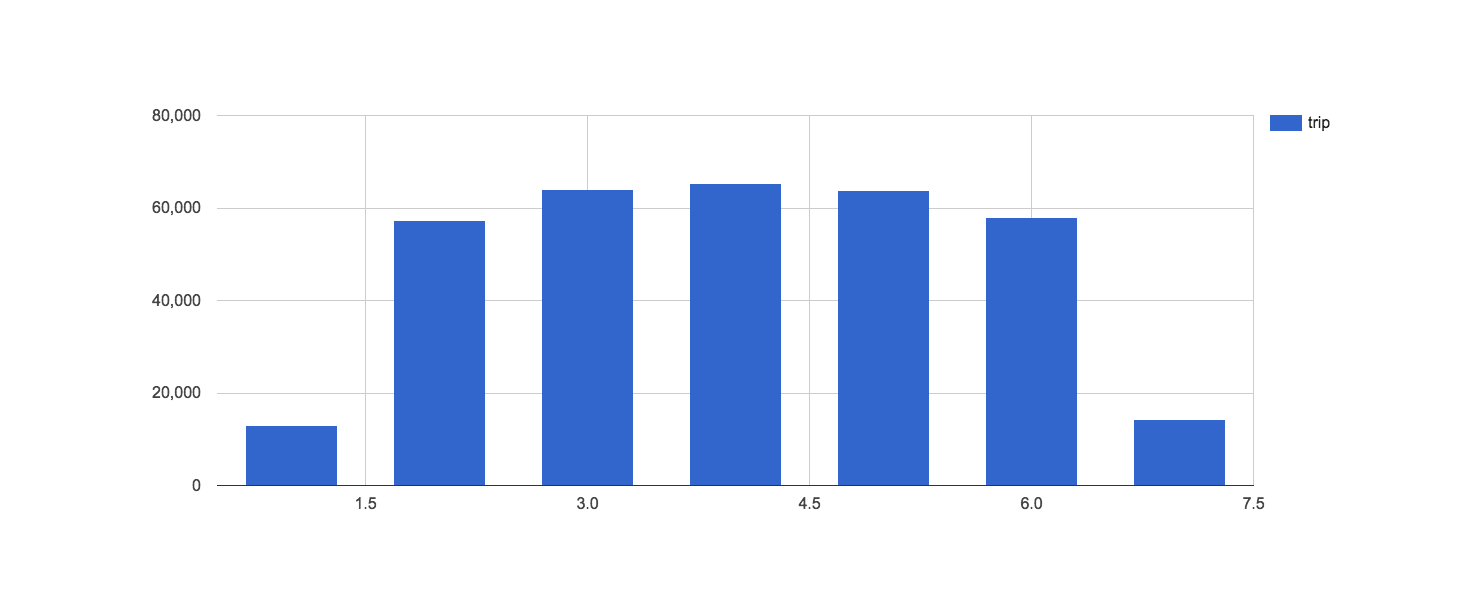

In [31]:
%%chart columns --data results
height: 600

#### Traffic at station 497 (Union Square Green Market)

In [32]:
%%bq query --name trips_by_day_497
select EXTRACT(DAYOFWEEK FROM starttime) as day, count(*) as trip
  from `bigquery-public-data.new_york.citibike_trips`
  where start_station_id = 497 and usertype = 'Subscriber'
  group by day
  order by day

In [33]:
results = trips_by_day_497.execute().result()

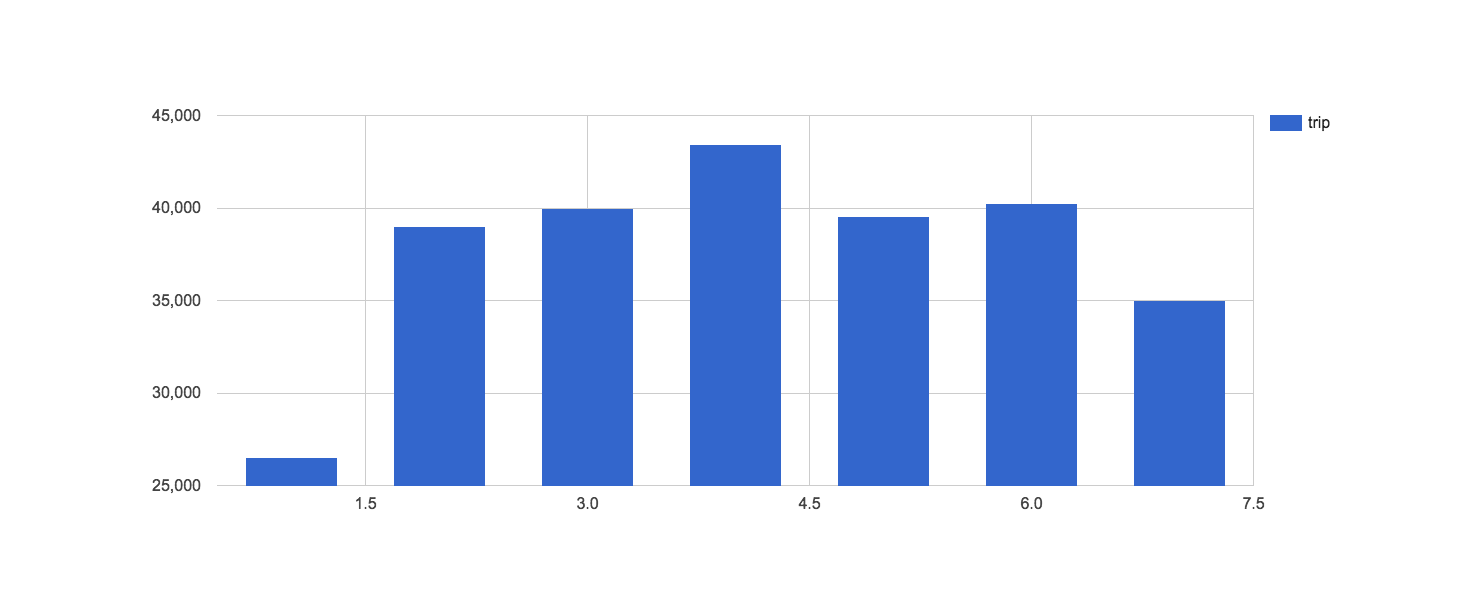

In [34]:
%%chart columns --data results
height: 600

Check the opening hours: https://www.grownyc.org/greenmarket/manhattan-union-square-m